## About iPython Notebooks ##

iPython Notebooks are interactive coding environments embedded in a webpage. You will be using iPython notebooks in this class. Make sure you fill in any place that says `# BEGIN CODE HERE #END CODE HERE`. After writing your code, you can run the cell by either pressing "SHIFT"+"ENTER" or by clicking on "Run" (denoted by a play symbol). Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All). 

 **What you need to remember:**

- Run your cells using SHIFT+ENTER (or "Run cell")
- Write code in the designated areas using Python 3 only
- Do not modify the code outside of the designated areas
- In some cases you will also need to explain the results. There will also be designated areas for that. 

Fill in your **NAME** and **AEM** below:

In [1]:
NAME = "Sotiris Ftiakas"
AEM = "3076"

---

# Assignment 3 - Ensemble Methods #

Welcome to your third assignment. This exercise will test your understanding on Ensemble Methods.

In [1]:
# Always run this cell
import numpy as np
import pandas as pd

# USE THE FOLLOWING RANDOM STATE FOR YOUR CODE
RANDOM_STATE = 42

## Download the Dataset ##
Download the dataset using the following cell or from this [link](https://github.com/sakrifor/public/tree/master/machine_learning_course/EnsembleDataset) and put the files in the same folder as the .ipynb file. 
In this assignment you are going to work with a dataset originated from the [ImageCLEFmed: The Medical Task 2016](https://www.imageclef.org/2016/medical) and the **Compound figure detection** subtask. The goal of this subtask is to identify whether a figure is a compound figure (one image consists of more than one figure) or not. The train dataset consits of 4197 examples/figures and each figure has 4096 features which were extracted using a deep neural network. The *CLASS* column represents the class of each example where 1 is a compoung figure and 0 is not. 


In [8]:
import urllib.request
url_train = 'https://github.com/sakrifor/public/raw/master/machine_learning_course/EnsembleDataset/train_set.csv'
filename_train = 'train_set.csv'
urllib.request.urlretrieve(url_train, filename_train)
url_test = 'https://github.com/sakrifor/public/raw/master/machine_learning_course/EnsembleDataset/test_set_noclass.csv'
filename_test = 'test_set_noclass.csv'
urllib.request.urlretrieve(url_test, filename_test)

('test_set_noclass.csv', <http.client.HTTPMessage at 0xca92255400>)

In [2]:
# Run this cell to load the data
train_set = pd.read_csv("train_set.csv").sample(frac=1).reset_index(drop=True)
train_set.head()
X = train_set.drop(columns=['CLASS'])
y = train_set['CLASS'].values

## 1.0 Testing different ensemble methods ##
In this part of the assignment you are asked to create and test different ensemble methods using the train_set.csv dataset. You should use **10-fold cross validation** for your tests and report the average f-measure and accuracy of your models.

### !!! Use n_jobs=-1 where is posibble to use all the cores of a machine for running your tests ###

### 1.1 Voting ###
Create a voting classifier which uses three estimators/classifiers. Test both soft and hard voting and choose the best one.

In [34]:
# BEGIN CODE HERE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score

# Here I build my classifiers:

cls1 = LogisticRegression(n_jobs=-1) # Classifier #1 
cls2 = DecisionTreeClassifier(random_state=RANDOM_STATE) # Classifier #2
cls3 = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=RANDOM_STATE) # Classifier #3 

vcls = VotingClassifier([('LR', cls1), ('DTC1', cls2), ('DTC2', cls3)], voting='hard') # Voting Classifier (HARD)
vcls2 = VotingClassifier([('LR', cls1), ('DTC1', cls2), ('DTC2', cls3)], voting="soft") # Voting Classifier (SOFT)

# Here I store the 10-fold cross validation results

score1a = cross_val_score(cls1, X, y, cv=10, scoring='accuracy', n_jobs=-1)
score1f = cross_val_score(cls1, X, y, cv=10, scoring="f1", n_jobs=-1)

score2a = cross_val_score(cls2, X, y, cv=10, scoring='accuracy', n_jobs=-1)
score2f = cross_val_score(cls2, X, y, cv=10, scoring="f1", n_jobs=-1)

score3a = cross_val_score(cls3, X, y, cv=10, scoring='accuracy', n_jobs=-1)
score3f = cross_val_score(cls3, X, y, cv=10, scoring="f1", n_jobs=-1)

scoreHARDa = cross_val_score(vcls, X, y, cv=10, scoring='accuracy', n_jobs=-1)
scoreHARDf = cross_val_score(vcls, X, y, cv=10, scoring="f1", n_jobs=-1)

scoreSOFTa = cross_val_score(vcls2, X, y, cv=10, scoring='accuracy', n_jobs=-1)
scoreSOFTf = cross_val_score(vcls2, X, y, cv=10, scoring="f1", n_jobs=-1)

# Here I print the average accuracy and f1_score of each model

print("Logistic Regression Accuracy:{}".format(score1a.mean()))
print("Logistic Regression F1 Score:{}".format(score1f.mean()))
print("\n")

print("No.1 Decision Tree Classifier Accuracy:{}".format(score2a.mean()))
print("No.1 Decision Tree Classifier F1 Score:{}".format(score2f.mean()))
print("\n")

print("No.2 Decision Tree Classifier Accuracy:{}".format(score3a.mean()))
print("No.2 Decision Tree Classifier F1 Score:{}".format(score3f.mean()))
print("\n")

print("Hard Voting Classifier Accuracy:{}".format(scoreHARDa.mean()))
print("Hard Voting Classifier F1 Score:{}".format(scoreHARDf.mean()))
print("\n")

print("Soft Voting Classifier Accuracy:{}".format(scoreSOFTa.mean()))
print("Soft Voting Classifier F1 Score:{}".format(scoreSOFTf.mean()))
print("\n")


avg_fmeasure = 0 # The average f-measure
avg_accuracy = 0 # The average accuracy


#END CODE HERE

Logistic Regression Accuracy:0.8377020115922263
Logistic Regression F1 Score:0.8623476018324802


No.1 Decision Tree Classifier Accuracy:0.7049363564041369
No.1 Decision Tree Classifier F1 Score:0.7492517408911731


No.2 Decision Tree Classifier Accuracy:0.6861279690873963
No.2 Decision Tree Classifier F1 Score:0.7343179810464037


Hard Voting Classifier Accuracy:0.7888339584043642
Hard Voting Classifier F1 Score:0.8237146689242456


Soft Voting Classifier Accuracy:0.7854932378679396
Soft Voting Classifier F1 Score:0.8211588381557702




In [ ]:
print("Classifier:")
print(vcls)
print("F1-Score:{} & Accuracy:{}".format(avg_fmeasure,avg_accuracy))

### 1.2 Stacking ###
Create a stacking classifier which uses two estimators/classifiers. Try different classifiers for the combination of the initial classifiers. Report your results in the following cell.

In [5]:
# BEGIN CODE HERE
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

# Here I build 4 different classifiers

cls1 = LogisticRegression(n_jobs=-1) # Classifier #1 
cls2 = DecisionTreeClassifier(random_state=RANDOM_STATE) # Classifier #2 
cls3 = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=RANDOM_STATE) # CLassifier #3
cls4 = DecisionTreeClassifier(max_leaf_nodes=350, random_state=RANDOM_STATE) # CLassifier #4

# Here I stack 2 classifiers each time, using all different combinations

scls = StackingClassifier([("LR", cls1),("DTC", cls2)]) # Stacking Classifier
scls2 = StackingClassifier([("LR", cls1),("DTC", cls3)]) # Stacking Classifier
scls3 = StackingClassifier([("LR", cls1),("DTC", cls4)]) # Stacking Classifier
scls4 = StackingClassifier([("DTC1", cls3),("DTC2", cls2)]) # Stacking Classifier
scls5 = StackingClassifier([("DTC1", cls4),("DTC2", cls2)]) # Stacking Classifier
scls6 = StackingClassifier([("DTC1", cls3),("DTC2", cls4)]) # Stacking Classifier

# Here I store the 10-fold cross validation results and print the average accuracy and f1_score of each stacking classifier

print("...Computing Scores...\n")

score1a = cross_val_score(scls, X, y, cv=10, scoring='accuracy', n_jobs=-1)
score1f = cross_val_score(scls, X, y, cv=10, scoring="f1", n_jobs=-1)
print("No.1 Stacking Classifier Accuracy:{}".format(score1a.mean()))
print("No.1 Stacking Classifier F1 Score:{}".format(score1f.mean()))
print("\n")

score2a = cross_val_score(scls2, X, y, cv=10, scoring='accuracy', n_jobs=-1)
score2f = cross_val_score(scls2, X, y, cv=10, scoring="f1", n_jobs=-1)
print("No.2 Stacking Classifier Accuracy:{}".format(score2a.mean()))
print("No.2 Stacking Classifier F1 Score:{}".format(score2f.mean()))
print("\n")

score3a = cross_val_score(scls3, X, y, cv=10, scoring='accuracy', n_jobs=-1)
score3f = cross_val_score(scls3, X, y, cv=10, scoring="f1", n_jobs=-1)
print("No.3 Stacking Classifier Accuracy:{}".format(score3a.mean()))
print("No.3 Stacking Classifier F1 Score:{}".format(score3f.mean()))
print("\n")

score4a = cross_val_score(scls4, X, y, cv=10, scoring='accuracy', n_jobs=-1)
score4f = cross_val_score(scls4, X, y, cv=10, scoring="f1", n_jobs=-1)
print("No.4 Stacking Classifier Accuracy:{}".format(score4a.mean()))
print("No.4 Stacking Classifier F1 Score:{}".format(score4f.mean()))
print("\n")

score5a = cross_val_score(scls5, X, y, cv=10, scoring='accuracy', n_jobs=-1)
score5f = cross_val_score(scls5, X, y, cv=10, scoring="f1", n_jobs=-1)
print("No.5 Stacking Classifier Accuracy:{}".format(score5a.mean()))
print("No.5 Stacking Classifier F1 Score:{}".format(score5f.mean()))
print("\n")

score6a = cross_val_score(scls6, X, y, cv=10, scoring='accuracy', n_jobs=-1)
score6f = cross_val_score(scls6, X, y, cv=10, scoring="f1", n_jobs=-1)
print("No.6 Stacking Classifier Accuracy:{}".format(score6a.mean()))
print("No.6 Stacking Classifier F1 Score:{}".format(score6f.mean()))
print("\n")


avg_fmeasure = 0 # The average f-measure
avg_accuracy = 0 # The average accuracy

#END CODE HERE

...Computing Scores...

No.6 Stacking Classifier Accuracy:0.7376048414592569
No.6 Stacking Classifier F1 Score:0.7890208719057586




In [ ]:
print("Classifier:")
print(scls)
print("F1-Score:{} & Accuracy:{}".format(avg_fmeasure,avg_accuracy))

### 1.3 Report the results ###  
Report the results of your experiments in the following cell. How did you choose your initial classifiers? 

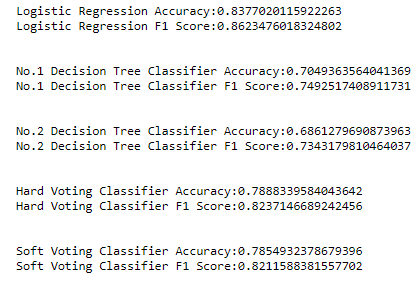

## 2.0 Randomization ##

**2.1** You are asked to create three ensembles of decision trees where each one is produced with a different way from the ones discussed in the lecture for producing homogeneous ensembles. Compare them with a simple decision tree classifier and report your results in the dictionaries (dict) below using as key the given name of your classifier and as value the f1/accuracy score. The dictionaries should contain four different elements.  

In [3]:
# BEGIN CODE HERE
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split


ens1 = BaggingClassifier(DecisionTreeClassifier(random_state=RANDOM_STATE), n_estimators=1000, n_jobs=-1, random_state=RANDOM_STATE)
ens2 = RandomForestClassifier(n_estimators=1000, random_state=RANDOM_STATE, n_jobs=-1)
ens3 = GradientBoostingClassifier(n_estimators=1000, random_state=RANDOM_STATE)
tree = DecisionTreeClassifier(random_state=RANDOM_STATE)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=RANDOM_STATE)

print("...Computing Scores...")

model1 = ens1.fit(X_train,y_train)
y_pred1 = model1.predict(X_test)
score1a = model1.score(X_test,y_test)
score1f = f1_score(y_test,y_pred1)
print("No.1 Ensemble Accuracy:{}".format(score1a))
print("No.1 Ensemble F1 Score:{}".format(score1f))
print("\n")


model2 = ens2.fit(X_train,y_train)
y_pred2 = model2.predict(X_test)
score2a = model2.score(X_test,y_test)
score2f = f1_score(y_test,y_pred2)
print("No.2 Ensemble Accuracy:{}".format(score2a))
print("No.2 Ensemble F1 Score:{}".format(score2f))
print("\n")

model3 = ens3.fit(X_train,y_train)
y_pred3 = model3.predict(X_test)
score3a = model3.score(X_test,y_test)
score3f = f1_score(y_test,y_pred3)
print("No.3 Ensemble Accuracy:{}".format(score3a))
print("No.3 Ensemble F1 Score:{}".format(score3f))
print("\n")

model4 = tree.fit(X_train,y_train)
y_pred4 = model4.predict(X_test)
score4a = model4.score(X_test,y_test)
score4f = f1_score(y_test,y_pred4)
print("Simple Decision Tree CLassifier Accuracy:{}".format(score4a))
print("Simple Decision Tree CLassifier F1 Score:{}".format(score4f))
print("\n")

# Need to make lists of names and accuracy of the models.

f_measures = dict({'ENS1':score1f, 'ENS2':score2f, 'ENS3':score3f, 'TREE':score4f})
accuracies = dict({'ENS1':score1a, 'ENS2':score2a, 'ENS3':score3a, 'TREE':score4a})
# Example f_measures = {'Simple Decision':0.8551, 'Ensemble with random ...': 0.92, ...}


#END CODE HERE

...Computing Scores...
No.1 Ensemble Accuracy:0.8093422306959008
No.1 Ensemble F1 Score:0.84251968503937


No.2 Ensemble Accuracy:0.8026692087702574
No.2 Ensemble F1 Score:0.8406466512702079


No.3 Ensemble Accuracy:0.8341277407054337
No.3 Ensemble F1 Score:0.8580750407830343


Simple Decision Tree CLassifier Accuracy:0.7063870352716873
Simple Decision Tree CLassifier F1 Score:0.7495934959349594




In [4]:
print(ens1)
print(ens2)
print(ens3)
print(tree)
for name,score in f_measures.items():
    print("Classifier:{} -  F1:{}".format(name,score))
for name,score in accuracies.items():
    print("Classifier:{} -  Accuracy:{}".format(name,score))

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=42,
  

**2.2** Describe your classifiers and your results.

YOUR ANSWER HERE

**2.3** Increasing the number of estimators in a bagging classifier can drastically increase the training time of a classifier. Is there any solution to this problem? Can the same solution be applied to boosting classifiers?

YOUR ANSWER HERE

## 3.0 Creating the best classifier ##

**3.1** In this part of the assignment you are asked to train the best possible ensemble! Describe the process you followed to achieve this result. How did you choose your classifier and your parameters and why. Report the f-measure & accuracy (10-fold cross validation) of your final classifier and results of classifiers you tried in the cell following the code. Can you achieve an accuracy over 83-84%?

In [ ]:
# BEGIN CODE HERE
best_cls = ""

best_fmeasure = ""
best_accuracy = ""


#END CODE HERE

In [ ]:
print("Classifier:")
print(best_cls)
print("F1-Score:{} & Accuracy:{}".format(best_fmeasure,best_accuracy))

**3.2** Describe the process you followed to achieve this result. How did you choose your classifier and your parameters and why. Report the f-measure & accuracy (10-fold cross validation) of your final classifier and results of classifiers you tried in the cell following the code.

YOUR ANSWER HERE

**3.3** Create a classifier that is going to be used in production - in a live system. Use the *test_set_noclass.csv* to make predictions. Store the predictions in a list.  

In [ ]:
# BEGIN CODE HERE
cls = ""
predictions = []

#END CODE HERE

In [ ]:
print(cls)
print(predictions)

LEAVE HERE ANY COMMENTS ABOUT YOUR CLASSIFIER

#### This following cell will not be executed. The test_set.csv with the classes will be made available after the deadline and this cell is for testing purposes!!! Do not modify it! ###

In [ ]:
from sklearn.metrics import f1_score,accuracy_score
final_test_set = pd.read_csv('test_set.csv')
ground_truth = final_test_set['CLASS']
print("Accuracy:{}".format(accuracy_score(predictions,ground_truth)))
print("F1-Score:{}".format(f1_score(predictions,ground_truth)))